In [104]:
import numpy as np
import matplotlib.pyplot as plt
from uncertainties import ufloat
from uncertainties.umath import *
from uncertainties import unumpy as unp
from scipy.optimize import curve_fit
from scipy import stats

##### The below code is just so that my plots would all load at the same time, no need to look into it. 

In [225]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

### Note - Python uses the equation $ \sigma_f^2 = \sigma_x^2 \Big( \frac{\partial f}{\partial x} \Big) + \sigma_y^2 \Big( \frac{\partial f}{\partial y} \Big) + \sigma_z^2 \Big( \frac{\partial f}{\partial z} \Big) + ...$ in the uncertainties package to propagate the uncertainty 

# Part 1 of CNMR Lab - Measurement of $\gamma$ for protons in water

$$\large \gamma = \frac{2\pi f_{resonance}}{B_0} \qquad \qquad Eq.(1)$$

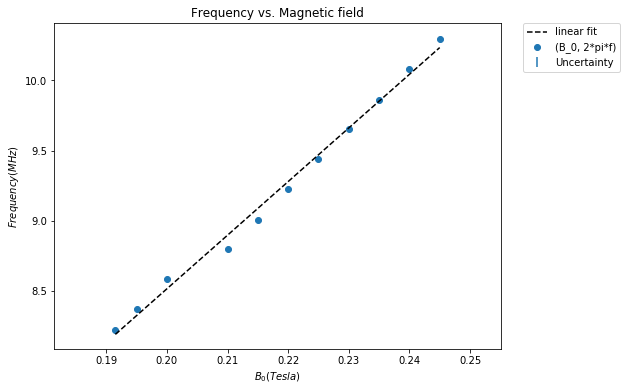

The slope of the fit line is :38.20419207446445
Using the slope of the fit line as per Eq.(1) from above, gamma/(2*pi) =38.204+/-0.01998 MHz/T


In [249]:
plt.figure(figsize=(8,6))
#these averages were taken in excel, see spread sheet
B_0 = [1.915, 1.95, 2, 2.1, 2.15, 2.2, 2.25, 2.3, 2.35, 2.4, 2.45] #[magnitude](kgauss)
freq = [8.222714, 8.374228, 8.586812, 8.80077, 9.007948, 9.227318, 
        9.438248, 9.656332, 9.86273, 10.083134, 10.294296]         #[magnitude](MHz)
B_0_uncertainty = 0.001 # (kgauss) for all vals
freq_uncertainty = 0.001 # (MHz) for all vals

freq_with_uncertainty = []

for i in range(len(freq)):
    x = ufloat(freq[i], freq_uncertainty)
    freq_with_uncertainty.append(x)

B_0_inTesla = []

for i in range(len(freq)):
    x = ufloat(B_0[i], B_0_uncertainty)
    B_0_inTesla.append((x*10**3)/(10**4))  

plt.scatter(unp.nominal_values(B_0_inTesla), freq, label = '(B_0, 2*pi*f)')
plt.errorbar(unp.nominal_values(B_0_inTesla), freq, yerr= freq_uncertainty, marker = 'None',
             fmt = 'o', label = 'Uncertainty')
fit1 = np.polyfit(unp.nominal_values(B_0_inTesla),freq, 1)
f1 = np.poly1d(fit1)
plt.plot(unp.nominal_values(B_0_inTesla) , f1(unp.nominal_values(B_0_inTesla)), '--k', label = 'linear fit')
m1, b1, r_value1, p_value1, std_err1 = stats.linregress(unp.nominal_values(B_0_inTesla),freq)

plt.ylabel('$Frequency (MHz)$')
plt.xlabel('$B_0 (Tesla)$')
plt.title('Frequency vs. Magnetic field')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show();

gamma_with_uncertainty = []
for i in range(len(freq_with_uncertainty)):
    gamma_with_uncertainty.append(freq_with_uncertainty[i]/B_0_inTesla[i])

gamma_uncertainty = np.mean(unp.std_devs(gamma_with_uncertainty))
gamma = m1 # slope of the linear fit 

print("The slope of the fit line is :" +str(m1))
print("Using the slope of the fit line as per Eq.(1) from above, gamma/(2*pi) =" 
      + str(np.round(gamma, 3)) + "+/-"+str(np.round(gamma_uncertainty, 5))+" MHz/T")

# Part 2 of CNMR Lab - Precise measurement of magnetic fields

$$\large MagneticField (B_0) = \frac{f_{resonance}(MHz)}{4.2577(MHz/kilogauss)} \qquad \qquad Eq.(2) $$

In [66]:
frequencies = [9.9650, 9.9630, 9.9600, 9.9800, 9.9750] #center, left, right, front, back (MHz) 
width_magnets = 6.4*10**-2 (m)
length_magnets = 15.4*10**-2 (m)

variation_in_B0 = []
for i in range(len(frequencies)-1):
    variation_in_B0.append(abs(frequencies[0]-frequencies[i+1]) / 4.2577)
print("Using Eq.(2) the variations in B_0 from center to left, right, front and back are as follows: "
      +str(variation_in_B0) +" kilogauss")


Using Eq.(2) the variations in B_0 from center to left, right, front and back are as follows: [0.0004697371820468018, 0.0011743429551163787, 0.0035230288653499706, 0.0023486859102331745] kilogauss


In [254]:
rightside_freq = [9.9506, 9.9495, 9.9513, 9.9519]  #all these frequencies are +/- .001 MHz 
leftside_freq = [10.01, 10.0057, 10.0054, 10.0066]
relative_difference = []
for i in range(len(rightside_freq)):
    relative_difference.append(rightside_freq[i]/leftside_freq[i])
print("The relative frequency differences are: " +str(np.subtract(1,relative_difference)) + "%")
freq_diff = np.subtract(leftside_freq,rightside_freq)
print("the absolute frequency differences are: " +str(freq_diff)+ "MHz")

The relative frequency differences are: [0.00593407 0.0056168  0.00540708 0.00546639]%
the absolute frequency differences are: [0.0594 0.0562 0.0541 0.0547]MHz


# Part 3 of CNMR Lab - Measurement of $\gamma$ for $^{19}F$ nuclei
#### using Eq.(1),
#### $$\large \gamma_p = \frac{2\pi f_{p_{res}}}{B_0} $$ and $$\large \gamma_F = \frac{2\pi f_{F_{res}}}{B_0}$$ then, $$\large \frac{\gamma_p}{f_{p_{res}}} = \frac{\gamma_F}{f_{F_{res}}}$$ Thus; $$ \large {\gamma_F} = \frac{\gamma_p * f_{F_{res}}}{f_{p_{res}}} \qquad \qquad Eq.(3)$$


In [255]:
#these averages were taken in excel, see spread sheet

flourine_freq = [7.912533333, 8.1103, 8.313566667, 8.512333333, 8.714533333, 8.914133333, 9.1192, 9.3156]
f_uncertainty = 0.001 #(MHz)
p_freq = [8.4096, 8.6192, 8.836266667, 9.047433333, 9.2629, 9.474, 9.692666667, 9.902133333]
p_uncertainty = 0.001 #(MHz)
B0_part3 = [1.95, 2, 2.05, 2.1, 2.15, 2.2, 2.25, 2.3]
B0_part3_uncertainty = 0.001 #(kgauss)

gamma_proton = 42.57747892 #known gamma for proton (MHz/T), found from: 
gamma_proton_unc = .00000029  #(MHz/T)     # N.I.S.T.S. , NIST: Atomic Spectra Database Lines Form (2017);
                                           # https://physics.nist.gov/cgi-bin/cuu/Value?gammapbar

print(
''' to Show we measured relatively accurate values, the following are the percentages for flourine's frequency 
compared to proton frequency: ''' +str(np.divide(flourine_freq,p_freq))
)


 to Show we measured relatively accurate values, the following are the percentages for flourine's frequency 
compared to proton frequency: [0.94089295 0.9409574  0.94084606 0.94085615 0.94079968 0.94090493
 0.940835   0.94076697]


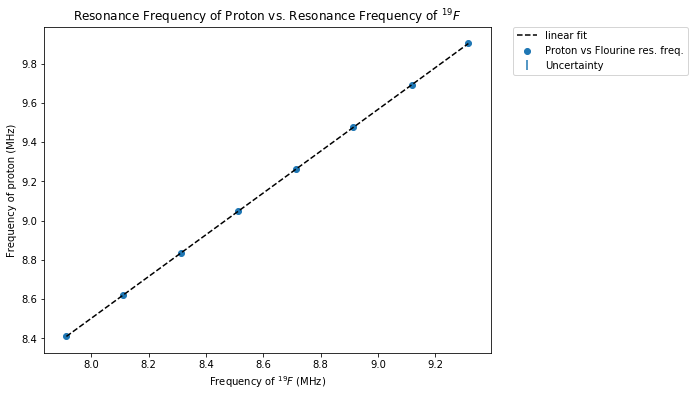

The slope of the fit line is :1.0636565861970722
Using Eq.(3), the value for gamma_19F/2pi = 40.02934732+/-0.00000027 MHz/T
This value is quite close to that of the accepted value: 40.052 MHz/T


In [262]:
plt.figure(figsize=(8,6))

plt.scatter(flourine_freq, p_freq, label = 'Proton vs Flourine res. freq.')

plt.errorbar(flourine_freq,p_freq, yerr= p_uncertainty, marker = 'None',
             fmt = 'o', label = 'Uncertainty')

fit2 = np.polyfit(flourine_freq,p_freq, 1)
f2 = np.poly1d(fit2)
plt.plot(flourine_freq , f2(flourine_freq), '--k', label = 'linear fit')
m2, b2, r_value2, p_value2, std_err2 = stats.linregress(flourine_freq,p_freq)
m2_uncertainty = []
for i in range(len(p_freq)):
    m2_uncertainty.append(unp.std_devs(p_freq[i]/flourine_freq[i]))
    
plt.ylabel('Frequency of proton (MHz)')
plt.xlabel('Frequency of $^{19}F$ (MHz)')
plt.title('Resonance Frequency of Proton vs. Resonance Frequency of $^{19}F$')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show();
gamma_over_m2 = ufloat(gamma_proton,gamma_proton_unc)/ufloat(m2,np.mean(unp.std_devs(m2_uncertainty)))
print("The slope of the fit line is :" +str(m2))
print("Using Eq.(3), the value for gamma_19F/2pi = " + str(gamma_over_m2) + " MHz/T")
print("This value is quite close to that of the accepted value: 40.052 MHz/T" ) # found from:
                        #R.C. West and M.J. Astle, Handbook of Chemistry and Physics (Boca Raton: CRC Press, 1982).


# Part 4 of CNMR Lab - Effect of paramagnetic ion concentration on $T_2^*$ of protons in water

In [207]:
#all time here is in (ms) and y_i are in arbitrary (units) 
#these were collected off the printed waveforms from the digital scope

#6.25% CuSO4
t_6 = [0, .3, .5, .65, .7, .8, .9, 1, 1.1, 1.2]
y_6 = [17.25, 8, 5.25, 3.5, 2.75, 2, 1.5, 1.25, 1, 0.75]
#12.5% CuSO4
t_12 =[0., 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1., 1.1] 
y_12 =[18.5, 9., 5., 3.75, 2.5, 2.25, 1.5, 1.25, 1.]
#25% CuSO4
t_25 =[0., 0.25, 0.45, 0.6, 0.71, 0.85, 0.91, 1.01]
y_25 =[20., 8.75, 5.25, 4.5, 2.5, 2., 1.5, 1.]
#50% CuSO4
t_50 =[0., 0.3, 0.5, 0.6, 0.7, 0.9, 1.]
y_50 =[17.25, 7.5, 4., 2.75, 2., 1.5, 1.]
#100% CuSO4
t_100 = [0., 0.25, 0.45, 0.6, 0.7, 0.85]
y_100 = [12.5, 4.5, 2.5, 1.25, 0.75, 0.5]

t_vals = [t_6, t_12, t_25, t_50, t_100]
y_vals = [y_6, y_12, y_25, y_50, y_100] 

scatter_titles = ['6.25% CuSO4', '12.5%  CuSO4', '25% CuSO4', '50% CuSO4', '100% CuSO4']
fit_titles = ['fit 1', 'fit 2', 'fit 3', 'fit 4', 'fit 5']

### As per the write-up, the decay of signal follows apx. $$\large e^{\frac{-t}{T_2^*}}$$ 

For 6.25% CuSO4, T2*=0.392


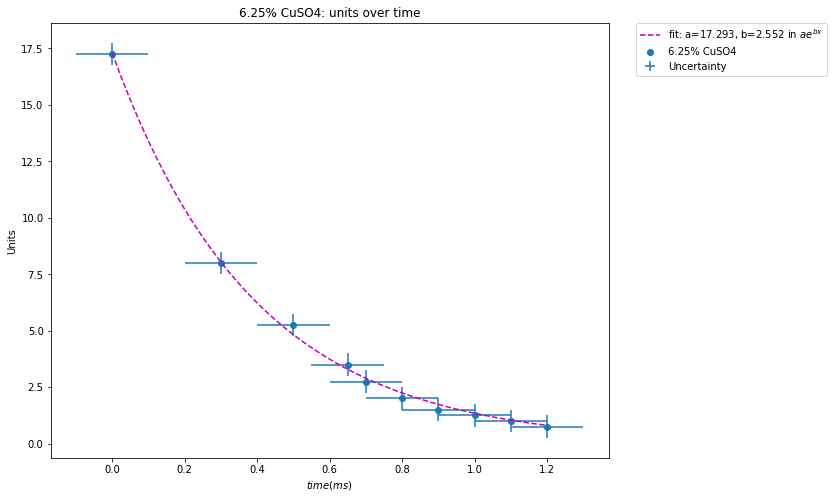

For 12.5%  CuSO4, T2*=0.378


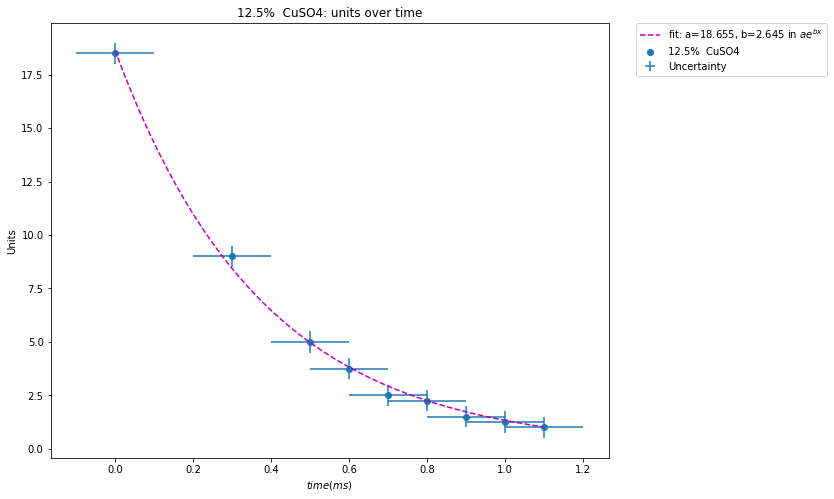

For 25% CuSO4, T2*=0.347


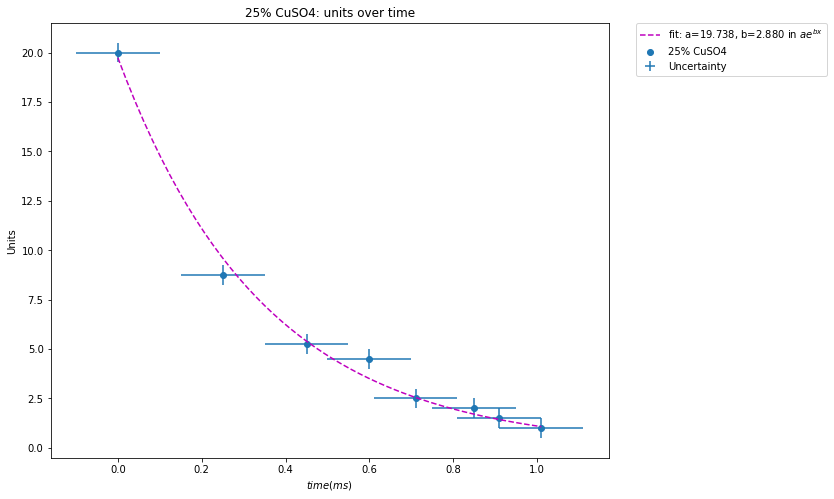

For 50% CuSO4, T2*=0.343


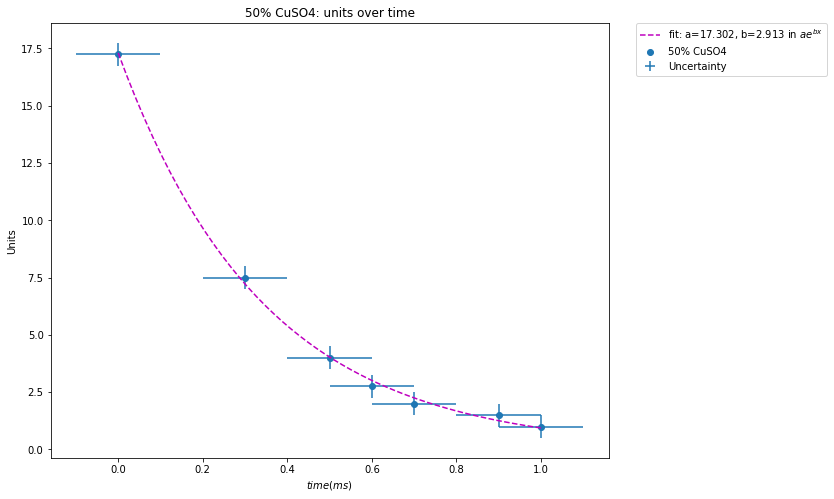

For 100% CuSO4, T2*=0.259


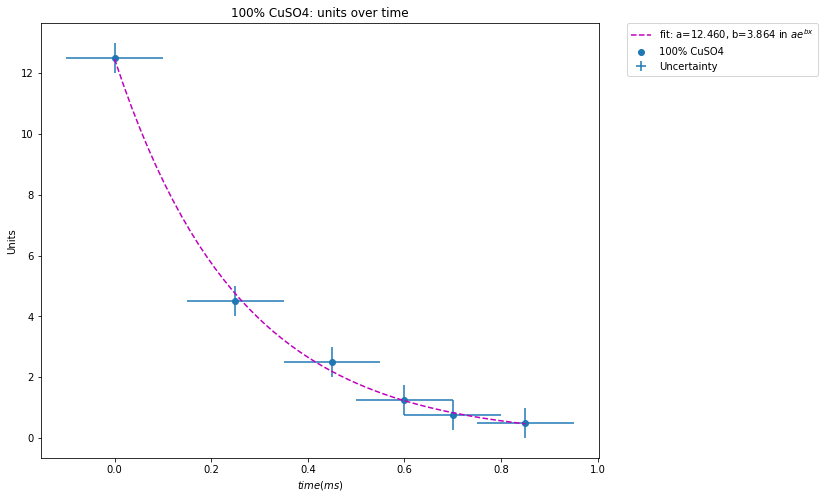

In [264]:

def func(x, a, b):
    exp_vals = []
    for i in range(len(x)):
        exp_vals.append(a * np.exp(-b * x[i]))
    return  exp_vals

for i in range(len(t_vals)):
    x_space = np.linspace(0, t_vals[i][-1], 50)
    plt.figure(figsize = (10,8))
    
    plt.scatter(t_vals[i], y_vals[i], label = scatter_titles[i])
    plt.errorbar(t_vals[i],y_vals[i], xerr= .1, yerr= .5 , marker = 'None',
             fmt = 'o', label = 'Uncertainty')
    
    popt, pcov = curve_fit(func, t_vals[i],  y_vals[i])
    plt.plot(x_space, func(x_space, *popt), 'm--', label='fit: a=%5.3f, b=%5.3f in $ae^{bx}$' % tuple(popt))
    
    print("For " + str(scatter_titles[i])+ ", T2*="  + str(np.round(1/popt[1], 3)))
    
    plt.xlabel('$time (ms)$')
    plt.ylabel('Units')
    plt.title( str(scatter_titles[i])+': units over time')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show();
    